## Linear Regression

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
X=np.linspace(0,20,30)
y=X*2+np.random.randn(X.shape[0])

In [3]:
lr=LinearRegression()
lr.fit(X.reshape(X.shape[0],1),y.reshape(y.shape[0],1))
print(lr.coef_)
print(lr.intercept_)

[[2.00366856]]
[-0.14318764]


/Users/Goleo8/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:509: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


In [4]:
y_pred=lr.predict(X.reshape(X.shape[0],1))

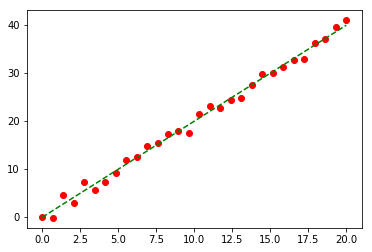

In [5]:
plt.scatter(X,y,color='red')
plt.plot(X,y_pred,'g--')
plt.show()

In [20]:
X1=np.random.randn(100,5)

In [21]:
a=np.array([3,4,5,2,1])
a=a.reshape(a.shape[0],-1)

In [22]:
y=np.dot(X1,a)

In [23]:
lr.fit(X1,y)
print(lr.coef_)
print(lr.intercept_)

[[3. 4. 5. 2. 1.]]
[2.77555756e-16]


In [25]:
w1=np.dot(np.dot(np.linalg.inv(np.dot(X1.T,X1)),X1.T),y)
print(w1)

[[3.]
 [4.]
 [5.]
 [2.]
 [1.]]


In [36]:
w2=np.zeros((5,1))
w2

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

# Gradient Descent

In [38]:
lrate=.01
for i in range(1000):
    w2=w2-lrate*np.dot(X1.T,(np.dot(X1,w2)-y))
    if (i+1)%100==0:
        print(w2.reshape(1,5))

[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]


# Stochastic Gradient Descent

In [48]:
w3=np.zeros((5,1))
lrate=.01
for index in range(1000):
    for i in range(X1.shape[0]):
        x_i=X1[i,:].reshape(1,-1)
        y_i=y[i]
        w2=w2-lrate*np.dot(x_i.T,(np.dot(x_i,w2)-y_i))
    if (index+1)%100==0:
        print(w2.reshape(1,5))

[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]
[[3. 4. 5. 2. 1.]]


# 模型分类

* Parametric learning algorithm
* Non-parametric learning algorithm
    * Locally Weighted Regression
    * KNN

# Locally Weighted Regression
 
Locally Weighted Regression: fit $\theta$ to minimize:   
$\sum_i^n{w^{(i)}(y^{(i)}-\theta^T*x^{(i)})}^2$


$w$=$exp(-\frac{(x^{(i)}-x)^2}{\tau^2})$   
$\tau$ is called bandwith
### Logistic Regression   
### Perception Algorithm   
### Newton Method
### Exponential Family
### Generalised Linear Models

## Generative Learning Algorithm vs Discriminative Learning Algorithm
#### Generative Learning Algo
model $p(x|y)$ and $p(y)$ then compute $p(y|x)=\frac{p(x|y)p(y)}{p(x)}$    
discrimitive algo get $p(y|x)$ with $h_{\theta}(x)$
#### 1. Gaussian Discriminant Analysis(Linear Discriminant Analysis) and Quadratic Discriminant Analysis
Given $p(x|y)$ is Gaussian and $p(y)$ is 伯努利分布

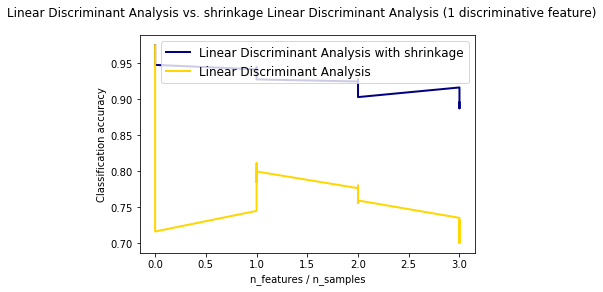

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis


n_train = 20  # samples for training
n_test = 200  # samples for testing
n_averages = 50  # how often to repeat classification
n_features_max = 75  # maximum number of features
step = 4  # step size for the calculation


def generate_data(n_samples, n_features):
    """Generate random blob-ish data with noisy features.

    This returns an array of input data with shape `(n_samples, n_features)`
    and an array of `n_samples` target labels.

    Only one feature contains discriminative information, the other features
    contain only noise.
    """
    X, y = make_blobs(n_samples=n_samples, n_features=1, centers=[[-2], [2]])

    # add non-discriminative features
    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
    return X, y

acc_clf1, acc_clf2 = [], []
n_features_range = range(1, n_features_max + 1, step)
for n_features in n_features_range:
    score_clf1, score_clf2 = 0, 0
    for _ in range(n_averages):
        X, y = generate_data(n_train, n_features)

        clf1 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage='auto').fit(X, y)
        clf2 = LinearDiscriminantAnalysis(solver='lsqr', shrinkage=None).fit(X, y)

        X, y = generate_data(n_test, n_features)
        score_clf1 += clf1.score(X, y)
        score_clf2 += clf2.score(X, y)

    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)

features_samples_ratio = np.array(n_features_range) / n_train

plt.plot(features_samples_ratio, acc_clf1, linewidth=2,
         label="Linear Discriminant Analysis with shrinkage", color='navy')
plt.plot(features_samples_ratio, acc_clf2, linewidth=2,
         label="Linear Discriminant Analysis", color='gold')

plt.xlabel('n_features / n_samples')
plt.ylabel('Classification accuracy')

plt.legend(loc=1, prop={'size': 12})
plt.suptitle('Linear Discriminant Analysis vs. \
shrinkage Linear Discriminant Analysis (1 discriminative feature)')
plt.show()

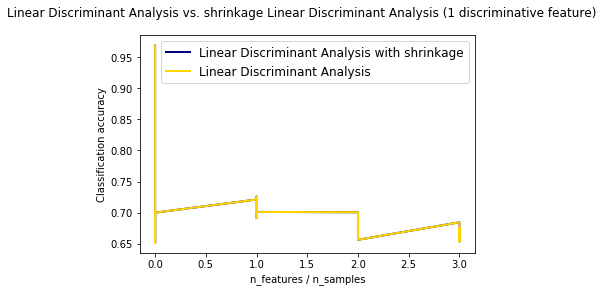

In [7]:
n_train = 20  # samples for training
n_test = 200  # samples for testing
n_averages = 50  # how often to repeat classification
n_features_max = 75  # maximum number of features
step = 4  # step size for the calculation


def generate_data(n_samples, n_features):
    """Generate random blob-ish data with noisy features.

    This returns an array of input data with shape `(n_samples, n_features)`
    and an array of `n_samples` target labels.

    Only one feature contains discriminative information, the other features
    contain only noise.
    """
    X, y = make_blobs(n_samples=n_samples, n_features=1, centers=[[-2], [2]])

    # add non-discriminative features
    if n_features > 1:
        X = np.hstack([X, np.random.randn(n_samples, n_features - 1)])
    return X, y

acc_clf1, acc_clf2 = [], []
n_features_range = range(1, n_features_max + 1, step)
for n_features in n_features_range:
    score_clf1, score_clf2 = 0, 0
    for _ in range(n_averages):
        X, y = generate_data(n_train, n_features)

        clf1 = QuadraticDiscriminantAnalysis().fit(X, y)
        clf2 = QuadraticDiscriminantAnalysis().fit(X, y)

        X, y = generate_data(n_test, n_features)
        score_clf1 += clf1.score(X, y)
        score_clf2 += clf2.score(X, y)

    acc_clf1.append(score_clf1 / n_averages)
    acc_clf2.append(score_clf2 / n_averages)

features_samples_ratio = np.array(n_features_range) / n_train

plt.plot(features_samples_ratio, acc_clf1, linewidth=2,
         label="Linear Discriminant Analysis with shrinkage", color='navy')
plt.plot(features_samples_ratio, acc_clf2, linewidth=2,
         label="Linear Discriminant Analysis", color='gold')

plt.xlabel('n_features / n_samples')
plt.ylabel('Classification accuracy')

plt.legend(loc=1, prop={'size': 12})
plt.suptitle('Linear Discriminant Analysis vs. \
shrinkage Linear Discriminant Analysis (1 discriminative feature)')
plt.show()

### Naive Bayss

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
y_pred = gnb.fit(iris.data, iris.target).predict(iris.data)
print("Number of mislabeled points out of a total %d points : %d"
      % (iris.data.shape[0],(iris.target != y_pred).sum()))
